# (Figure1)-A Single Cell and Spatial Transcriptomic Landscape of the Gastric Mucosal Microenvironment.



In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
import omicverse as ov 



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.6, Tutorials: https://omicverse.readthedocs.io/


In [4]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
#ov.plot_set()

font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)


In [5]:
from matplotlib import rcParams
D ={#'font.family':['sans serif'],
    #'serif#'mathtext,fontset':'dejavuserif'
    #'font.sans-serif':['Arial'],
    "pdf.fonttype": 42,
    # Remove legend frame"legend.frameon": True,
    "legend.fontsize": 12,
    'font.size':12,
    'xtick.labelsize':12,
    'ytick.labelsize':12
}
rcParams.update(D)

In [6]:
# plot setting
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [7]:
sc_color=['#7CBB5F',
 '#368650',
 '#A499CC',
 '#5E4D9A',
 '#78C2ED',
 '#866017',
 '#9F987F',
 '#E0DFED',
 '#EF7B77',
 '#279AD7',
 '#F0EEF0',
 '#1F577B',
 '#A56BA7',
 '#E0A7C8',
 '#E069A6',
 '#941456',
 '#FCBC10',
 '#EAEFC5',
 '#01A0A7',
 '#75C8CC',
 '#F0D7BC',
 '#D5B26C',
 '#D5DA48',
 '#B6B812',
 '#9DC3C3',
 '#A89C92',
 '#FEE00C',
 '#FEF2A1']

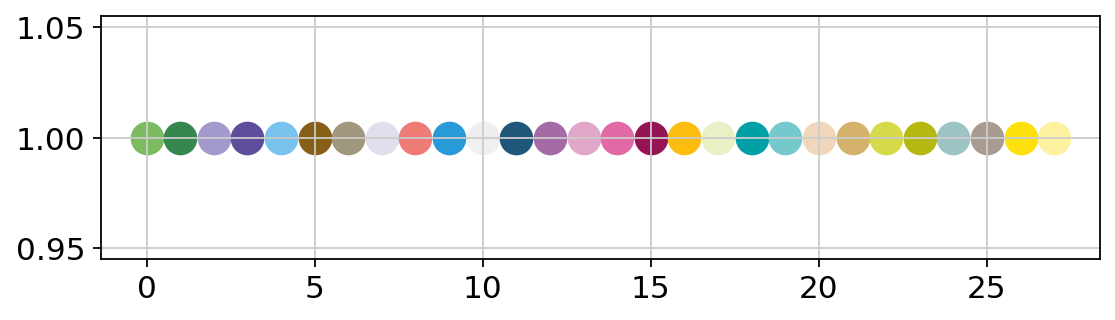

In [8]:
plt.figure(figsize=(8, 2))
for i in range(len(sc_color)):
    plt.scatter(i, 1, c=sc_color[i], s=200)
plt.show()

In [9]:
adata = sc.read_h5ad("Gastric/Data/Gastric_anno.h5ad")
adata

AnnData object with n_obs × n_vars = 63398 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

# Main plot

In [ ]:
type_color_rna={
    'Epithelial cell':sc_color[16],
    'B cell(Plasma cell)':sc_color[14],
    'B cell':sc_color[15],
    'Endocrine cell':sc_color[0],
    'Myeloid cell':sc_color[3],
    'Mast cell':sc_color[21],
    'Fibroblast':sc_color[8],
    'NK/T cell':sc_color[18],
    'Smooth muscle cell':sc_color[24],
    'Endothelial cell':sc_color[11],
    'Neutrophil':sc_color[9]
}
adata.uns['major_celltype_colors']=adata.obs['major_celltype'].cat.categories.map(type_color_rna).values.tolist()


In [ ]:
fig,ax=plt.subplots( figsize = (5,5))
ax = ov.utils.embedding(adata,
                basis='X_umap',
                color=['Sample'],
                title='Sample type',
                frameon='small',
                show=False,
                ax=ax)
ax.set_title('Sample type',fontdict={'fontsize':13})
plt.savefig("Gastric/Figure/Figure1/Figure1_A.png",dpi=300,bbox_inches = 'tight')

In [ ]:
#fig,ax=plt.subplots( figsize = (4,4))
ov.utils.plot_embedding_celltype(adata,figsize=(6,4),basis='X_umap',
                            celltype_key='major_celltype',
                            title='Cell type',
                            celltype_range=(2,11),
                            embedding_range=(4,10),
                            )

plt.savefig("Gastric/Figure/Figure1/Figure1_B.png",dpi=300,bbox_inches = 'tight')


In [ ]:
from matplotlib import patheffects
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))

adata.obs['celltype'] = adata.obs['major_celltype']
adata.uns['celltype_colors']=adata.uns['major_celltype_colors']

ov.pl.embedding(adata,
                  basis='X_umap',
                  color=['celltype'],
                    size=8,title='',
                   show=False, legend_loc=None, add_outline=False, 
                   frameon='small',legend_fontoutline=2,ax=ax
                 )

type_color_rna={
    'Epithelial cell':sc_color[16],
    'B cell(Plasma cell)':sc_color[14],
    'B cell':sc_color[15],
    'Endocrine cell':sc_color[0],
    'Myeloid cell':sc_color[3],
    'Mast cell':sc_color[21],
    'Fibroblast':sc_color[8],
    'NK/T cell':sc_color[18],
    'Smooth muscle cell':sc_color[24],
    'Endothelial cell':sc_color[11],
    'Neutrophil':sc_color[9]
}



c1=['Epithelial cell'] 
c2=['B cell(Plasma cell)']
c3=['B cell']
c4=['Endocrine cell']
c5=['Myeloid cell']
c6=['Mast cell']
c7=['Fibroblast']
c8=['NK/T cell']
c9=['Smooth muscle cell']
c10=['Endothelial cell']
c11=['Neutrophil']
ov.pl.contour(ax=ax,adata=adata,groupby='celltype',clusters=c1,
       basis='X_umap',contour_threshold=0.1,colors=type_color_rna[c1[0]],
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata,groupby='celltype',clusters=c2,
       basis='X_umap',contour_threshold=0.1,colors=type_color_rna[c2[0]],
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata,groupby='celltype',clusters=c3,
       basis='X_umap',contour_threshold=0.1,colors=type_color_rna[c3[0]],
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata,groupby='celltype',clusters=c4,
       basis='X_umap',contour_threshold=0.1,colors=type_color_rna[c4[0]],
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata,groupby='celltype',clusters=c5,
       basis='X_umap',contour_threshold=0.1,colors=type_color_rna[c5[0]],
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata,groupby='celltype',clusters=c6,
       basis='X_umap',contour_threshold=0.1,colors=type_color_rna[c6[0]],
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata,groupby='celltype',clusters=c7,
       basis='X_umap',contour_threshold=0.1,colors=type_color_rna[c7[0]],
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata,groupby='celltype',clusters=c8,
       basis='X_umap',contour_threshold=0.1,colors=type_color_rna[c8[0]],
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata,groupby='celltype',clusters=c9,
       basis='X_umap',contour_threshold=0.1,colors=type_color_rna[c9[0]],
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata,groupby='celltype',clusters=c10,
       basis='X_umap',contour_threshold=0.1,colors=type_color_rna[c10[0]],
        linestyles='dashed',)
ov.pl.contour(ax=ax,adata=adata,groupby='celltype',clusters=c11,
       basis='X_umap',contour_threshold=0.1,colors=type_color_rna[c11[0]],
        linestyles='dashed',)

for i in range(1, 12):
    # 创建一个集合，包含除了当前索引颜色列表以外的所有颜色列表
    exclude_colors = set()
    for j in range(1, 12):
        if j != i:
            exclude_colors.update(eval(f'c{j}'))
    
    # 获取当前索引的颜色列表
    current_color_list = eval(f'c{i}')
    # 假设我们只使用列表中的第一个颜色
    current_color = current_color_list[0] if current_color_list else None
    
    # 确保 current_color 不是 None
    if current_color is not None:
        # 调用 ov.pl.embedding_adjust 函数
        ov.pl.embedding_adjust(
            adata,
            groupby='celltype',
            exclude=exclude_colors,
            basis='X_umap',
            ax=ax,
            adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
            text_kwargs=dict(fontsize=10, weight='normal', color='#000000',
                             path_effects=[patheffects.withStroke(linewidth=2, foreground='w')])
        )
plt.savefig("Gastric/Figure/Figure1/Figure1_B.png",dpi=300,bbox_inches = 'tight')


In [ ]:
current_color

In [43]:
ov.pl.orange_color[:3]

['#EFBD49', '#D48F3E', '#AC8A3E']

In [44]:
ov.pl.orange_color[5:7]

['#E1C085', '#CEBC49']

In [45]:
adata.uns['Person_colors'] = ov.pl.blue_color[2:5] + [ov.pl.green_color[3]] + [ov.pl.green_color[5]] + ov.pl.orange_color[:3] + ov.pl.orange_color[5:8]

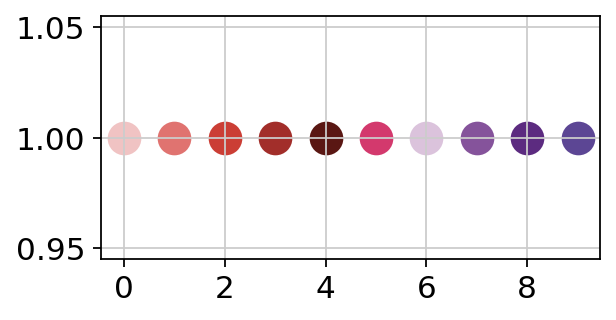

In [46]:
plt.figure(figsize=(4, 2))
for i in range(len(ov.pl.red_color)):
    plt.scatter(i, 1, c=ov.pl.red_color[i], s=200)
plt.show()

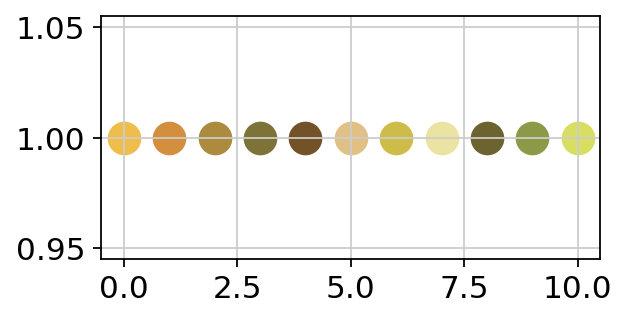

In [47]:
plt.figure(figsize=(4, 2))
for i in range(len(ov.pl.orange_color)):
    plt.scatter(i, 1, c=ov.pl.orange_color[i], s=200)
plt.show()

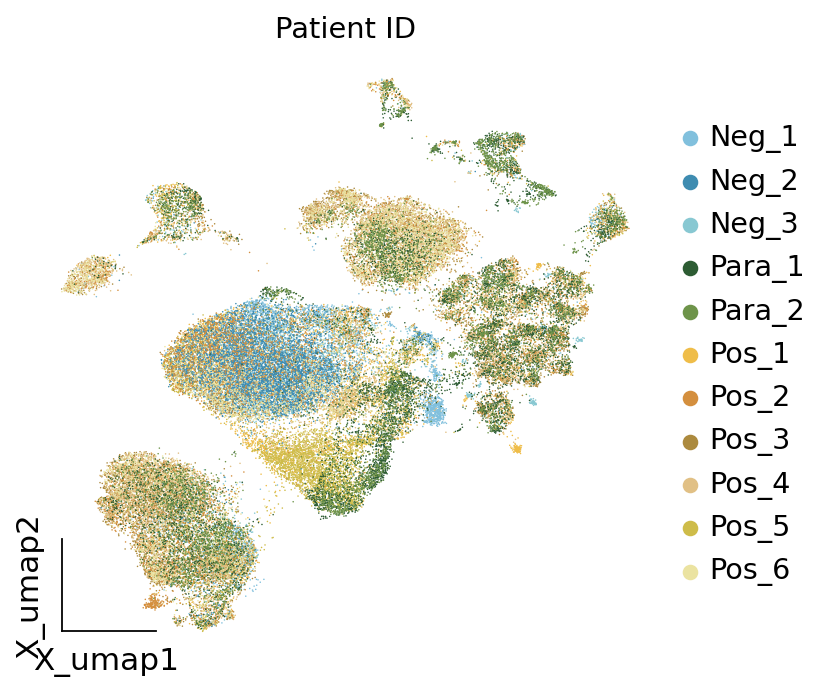

In [48]:
fig,ax=plt.subplots( figsize = (5,5))
ax = ov.utils.embedding(adata,
                basis='X_umap',
                color=['Person'],
                title='Patient ID',
                frameon='small',
                show=False,
                ax=ax)
ax.set_title('Patient ID',fontdict={'fontsize':13})
plt.savefig("Gastric/Figure/Figure1/Figure1_C.png",dpi=300,bbox_inches = 'tight')

# Composition

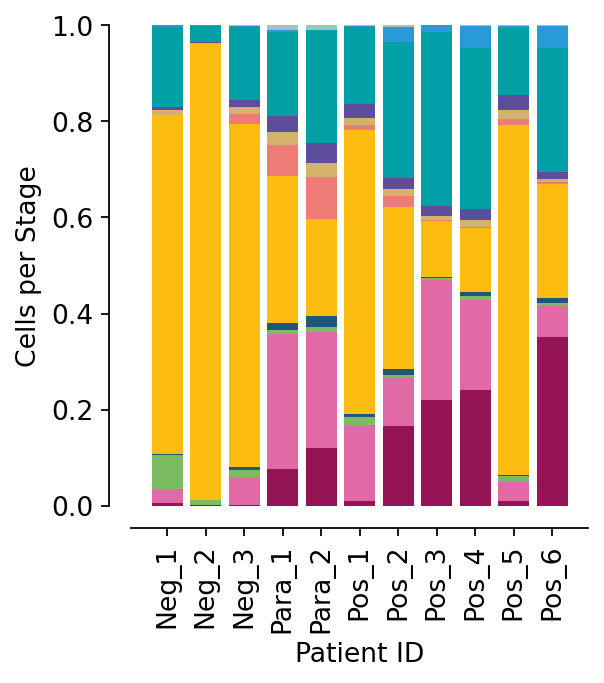

In [14]:
ax = ov.utils.plot_cellproportion(adata=adata,celltype_clusters='major_celltype',
                    visual_clusters='Person',
                    visual_name='Patient ID',figsize=(4,4.5))
plt.savefig("Gastric/Figure/Figure1/Figure1_D.png",dpi=300,bbox_inches = 'tight')

In [56]:
help(ov.utils.plot_cellproportion)

Help on function plot_cellproportion in module omicverse.utils._plot:

plot_cellproportion(adata: anndata._core.anndata.AnnData, celltype_clusters: str, visual_clusters: str, visual_li=None, visual_name: str = '', figsize: tuple = (4, 6), ticks_fontsize: int = 12, labels_fontsize: int = 12, legend: bool = False)
    Plot cell proportion of each cell type in each visual cluster.
    
    Arguments:
        adata: AnnData object.
        celltype_clusters: Cell type clusters.
        visual_clusters: Visual clusters.
        visual_li: Visual cluster list.
        visual_name: Visual cluster name.
        figsize: Figure size.
        ticks_fontsize: Ticks fontsize.
        labels_fontsize: Labels fontsize.
        legend: Whether to show legend.



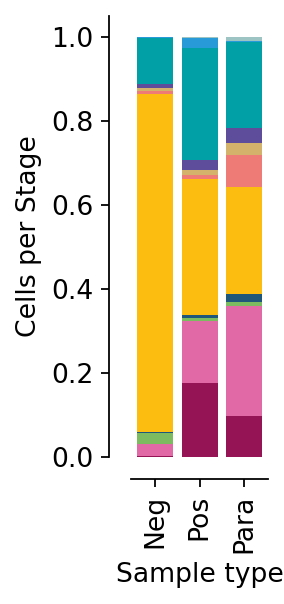

In [19]:
ax = ov.utils.plot_cellproportion(adata=adata,celltype_clusters='major_celltype',
                    visual_clusters='Sample',
                    visual_name='Sample type',figsize=(2,4))
plt.savefig("Gastric/Figure/Figure1/Figure1_E.png",dpi=300,bbox_inches = 'tight')

chi2: 16300.89860402397, dof: 20, pvalue: 0.0


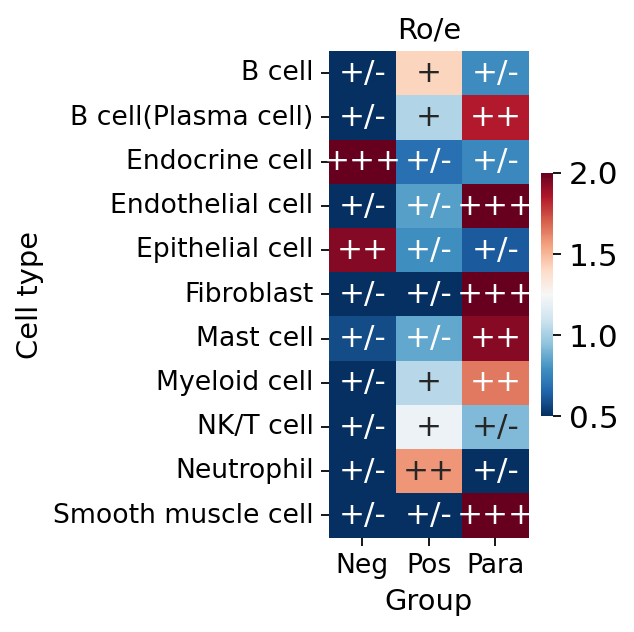

In [20]:
roe=ov.utils.roe(adata,sample_key='Sample',cell_type_key='major_celltype')
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2,4))

transformed_roe = roe.copy()
transformed_roe = transformed_roe.applymap(
    lambda x: '+++' if x >= 2 else ('++' if x >= 1.5 else ('+' if x >= 1 else '+/-')))

sns.heatmap(roe, annot=transformed_roe, cmap='RdBu_r', fmt='', 
            cbar=True, ax=ax,vmin=0.5,vmax=2,cbar_kws={'shrink':0.5})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Group',fontsize=13)
plt.ylabel('Cell type',fontsize=13)
plt.title('Ro/e',fontsize=13)
plt.savefig("Gastric/Figure/Figure1/Figure1_H.png",dpi=300,bbox_inches = 'tight')

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_Sample']`


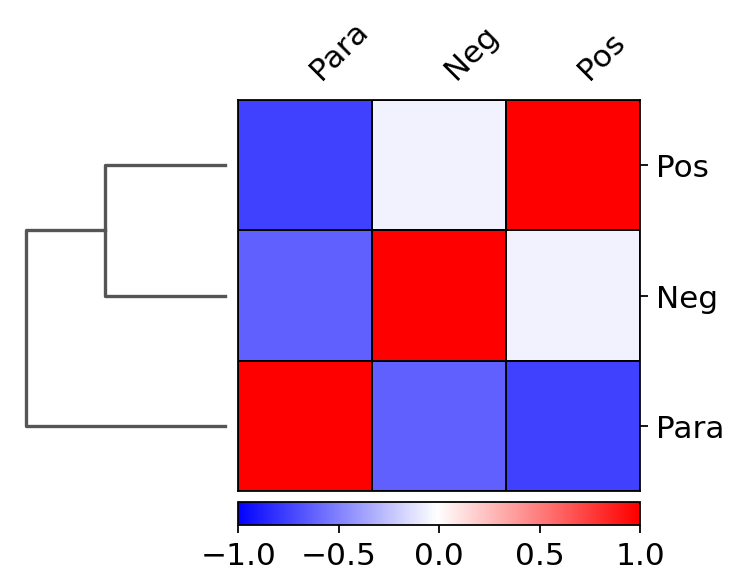

In [21]:
ax = sc.pl.correlation_matrix(adata, 'Sample', figsize=(5,3.5))

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_Person']`


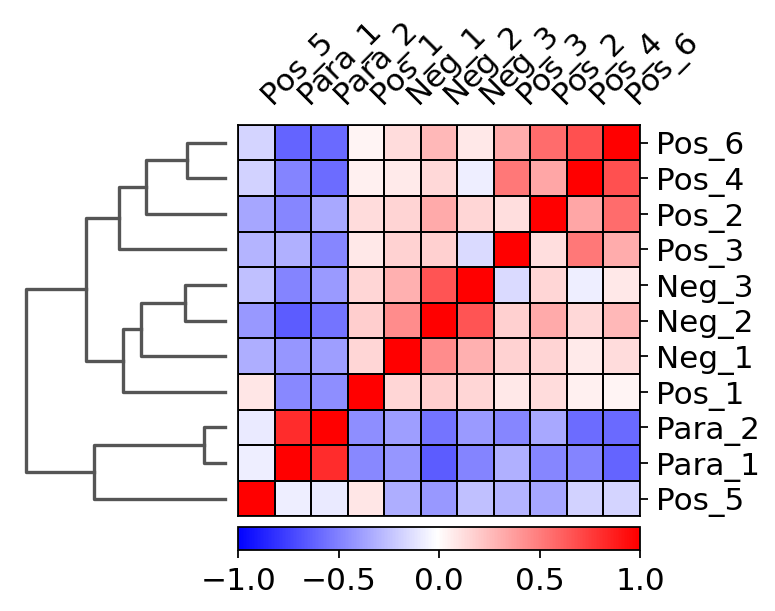

In [22]:
ax = sc.pl.correlation_matrix(adata, 'Person', figsize=(5,3.5),show=False)
plt.savefig("Gastric/Figure/Figure1/Figure1_F.png",dpi=300,bbox_inches = 'tight')

# Marker gene

In [10]:
marker_genes_dict = {
    'Epithelial cell':['MUC5AC','MUC1','CDH1',],#上皮细胞
    'B cell(Plasma cell)':['MZB1','DERL3','IGKC'],#浆细胞（B细胞一种）
    'B cell':['CD79A','MS4A1','BANK1'],
    'Endocrine cell':['CHGA','PCSK1N','SCG5'],#内分泌细胞,
    'Myeloid cell':['AIF1','CD68','MS4A7'],#髓系细胞
    'Mast cell':['TPSAB1','TPSB2','CPA3'],#肥大细胞
    'Fibroblast':['DCN','DPT','PDGFRA'],#成纤维细胞
    'NK/T cell':['CD2','CD3E','CD7'],
    'Smooth muscle cell':['ACTA2','MYH11','ACTG2'],#平滑肌细胞
    'Endothelial cell':['CLDN5','PECAM1','ACKR1'],#内皮细胞
    'Neutrophil':['G0S2','CSF3R','FCGR3B'] #中性粒细胞
}

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_major_celltype']`


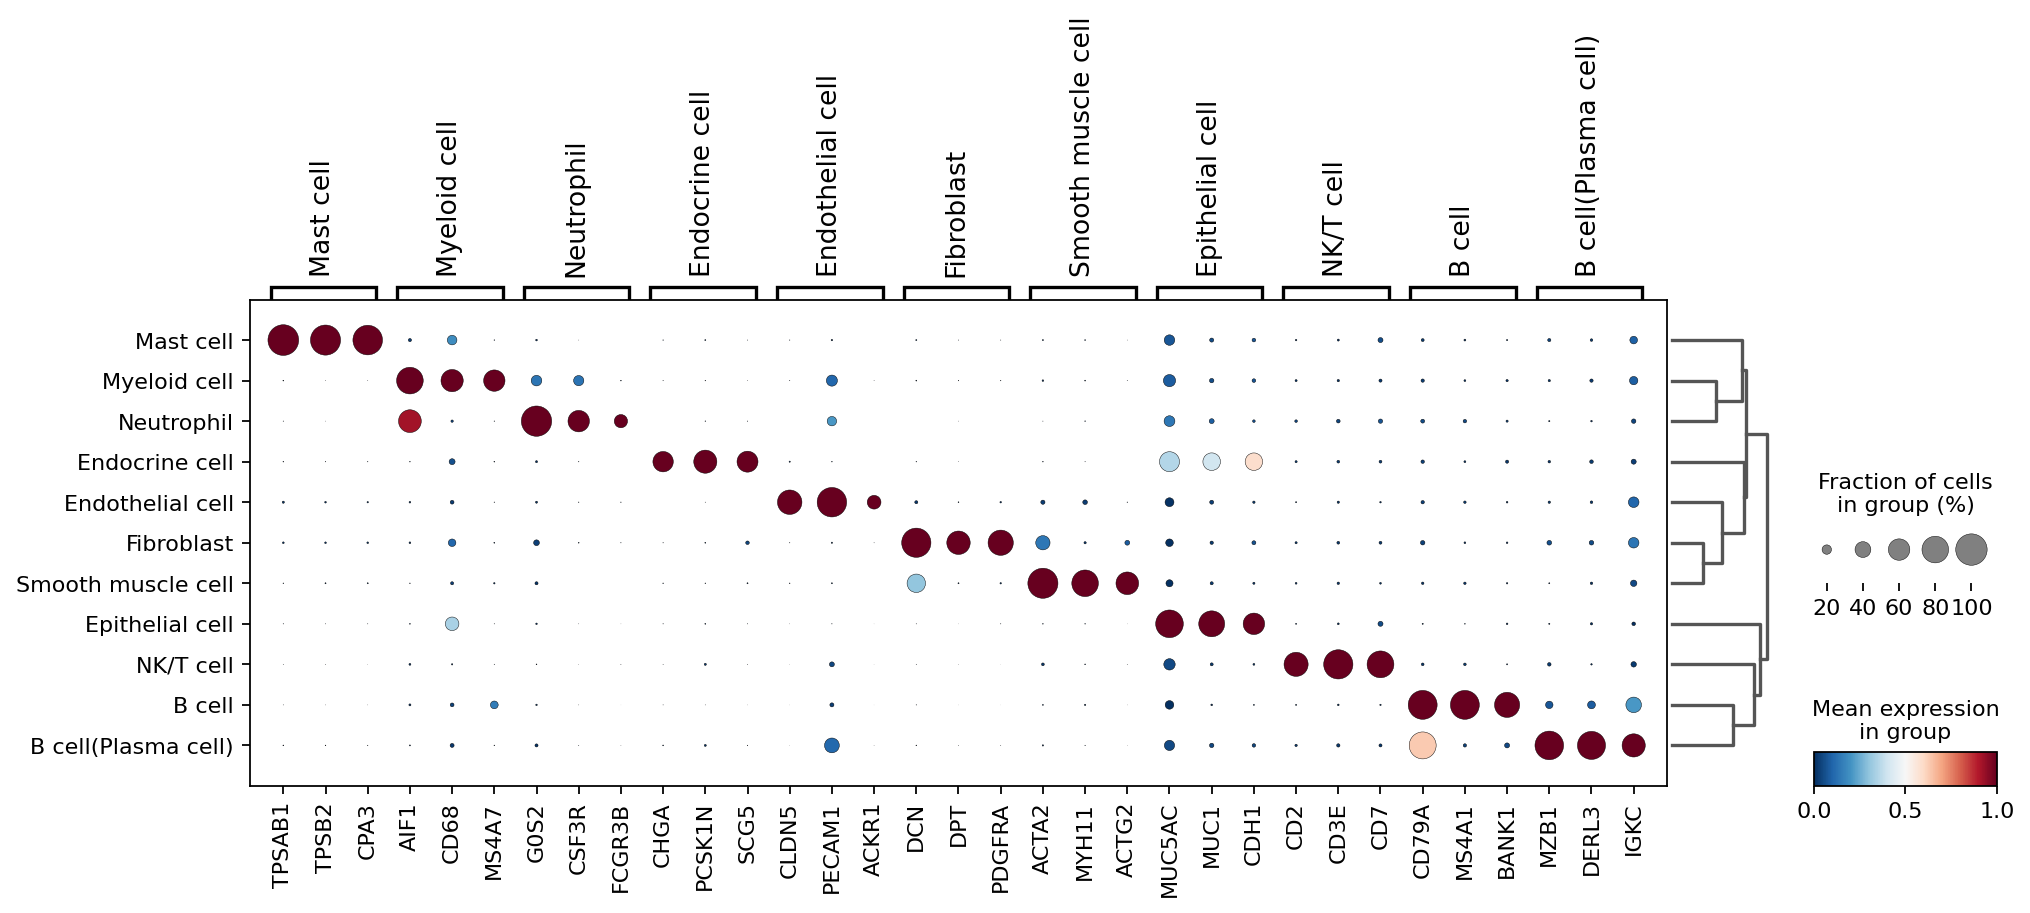

In [61]:
sc.tl.dendrogram(adata,groupby='major_celltype')

ax = sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby='major_celltype',
    dendrogram=True,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
    var_group_labels=False, # 是否需要var
    figsize=(14,4),
    return_fig=False,
    show=False,
)

plt.savefig("Gastric/Figure/Figure1/Figure1_G.png",dpi=300,bbox_inches = 'tight')

In [25]:
from scanpy.plotting._anndata import _prepare_dataframe

In [26]:
var_group_labels = []
_var_names = []
var_group_positions = []
start = 0
for label, vars_list in marker_genes_dict.items():
    if isinstance(vars_list, str):
        vars_list = [vars_list]
    _var_names.extend(list(vars_list))
    var_group_labels.append(label)
    var_group_positions.append((start, start + len(vars_list) - 1))
    start += len(vars_list)

var_group_labels,_var_names

(['Epithelial cell',
  'B cell(Plasma cell)',
  'B cell',
  'Endocrine cell',
  'Myeloid cell',
  'Mast cell',
  'Fibroblast',
  'NK/T cell',
  'Smooth muscle cell',
  'Endothelial cell',
  'Neutrophil'],
 ['MUC5AC',
  'MUC1',
  'CDH1',
  'MZB1',
  'DERL3',
  'IGKC',
  'CD79A',
  'MS4A1',
  'BANK1',
  'CHGA',
  'PCSK1N',
  'SCG5',
  'AIF1',
  'CD68',
  'MS4A7',
  'TPSAB1',
  'TPSB2',
  'CPA3',
  'DCN',
  'DPT',
  'PDGFRA',
  'CD2',
  'CD3E',
  'CD7',
  'ACTA2',
  'MYH11',
  'ACTG2',
  'CLDN5',
  'PECAM1',
  'ACKR1',
  'G0S2',
  'CSF3R',
  'FCGR3B'])

In [27]:
categories, obs_tidy = _prepare_dataframe(
            adata,
            _var_names,
            groupby='major_celltype',
            use_raw=True,
            log=False,
            num_categories=7,
            layer=None,
            gene_symbols=None,
        )

In [28]:
obs_tidy

,MUC5AC,MUC1,CDH1,MZB1,DERL3,IGKC,CD79A,MS4A1,BANK1,CHGA,...,CD7,ACTA2,MYH11,ACTG2,CLDN5,PECAM1,ACKR1,G0S2,CSF3R,FCGR3B
major_celltype,,,,,,,,,,,,,,,,,,,,,
Epithelial cell,4.478277,2.068296,0.525399,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Epithelial cell,2.468521,0.000000,1.856686,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Epithelial cell,4.176123,2.510741,0.961758,0.000000,0.430980,0.430980,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Epithelial cell,5.466015,2.716742,2.716742,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Epithelial cell,5.289611,3.089643,1.202947,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B cell,0.000000,0.000000,0.000000,4.997774,4.916433,2.764656,4.686015,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Epithelial cell,0.000000,0.437822,0.437822,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.162313,0.0,0.0
Epithelial cell,0.000000,0.000000,1.855927,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [29]:
standard_scale  = 'var'
dot_color_df = obs_tidy.groupby(level=0, observed=True).mean()
if standard_scale == "group":
    dot_color_df = dot_color_df.sub(dot_color_df.min(1), axis=0)
    dot_color_df = dot_color_df.div(dot_color_df.max(1), axis=0).fillna(0)
elif standard_scale == "var":
    dot_color_df -= dot_color_df.min(0)
    dot_color_df = (dot_color_df / dot_color_df.max(0)).fillna(0)
elif standard_scale is None:
    pass
dot_color_df

,MUC5AC,MUC1,CDH1,MZB1,DERL3,IGKC,CD79A,MS4A1,BANK1,CHGA,...,CD7,ACTA2,MYH11,ACTG2,CLDN5,PECAM1,ACKR1,G0S2,CSF3R,FCGR3B
major_celltype,,,,,,,,,,,,,,,,,,,,,
Epithelial cell,1.000000,1.000000,1.000000,0.000000,0.003677,0.000000,0.000000,0.000000,0.002742,0.002107,...,0.051749,0.000705,0.001959,0.000465,0.000757,0.000000,0.000580,0.002368,0.000907,0.001056
NK/T cell,0.049305,0.019970,0.017231,0.020788,0.000000,0.021186,0.018615,0.019929,0.002392,0.001580,...,1.000000,0.013220,0.002800,0.001417,0.000301,0.046041,0.000517,0.000000,0.000636,0.002591
B cell(Plasma cell),0.048114,0.045838,0.040970,1.000000,1.000000,1.000000,0.630163,0.034308,0.048375,0.010031,...,0.019514,0.002105,0.000440,0.000295,0.000335,0.108094,0.000394,0.009603,0.001280,0.000881
Myeloid cell,0.082853,0.055238,0.067759,0.012518,0.020435,0.089812,0.023460,0.012720,0.013168,0.002500,...,0.021278,0.003888,0.002027,0.001194,0.002194,0.105304,0.002804,0.136362,0.129992,0.005120
Endocrine cell,0.354836,0.404694,0.589612,0.016742,0.021164,0.028535,0.034383,0.015249,0.017294,1.000000,...,0.030008,0.000529,0.000000,0.000000,0.005864,0.000159,0.000000,0.002935,0.002899,0.000000
Neutrophil,0.137287,0.087611,0.060239,0.004640,0.008546,0.041639,0.053210,0.050569,0.033058,0.000000,...,0.068776,0.000000,0.004183,0.000000,0.000000,0.209526,0.000000,1.000000,1.000000,1.000000
Mast cell,0.071309,0.051532,0.071086,0.035361,0.022579,0.091896,0.021866,0.013814,0.004914,0.004263,...,0.054829,0.003443,0.003209,0.000859,0.003265,0.007582,0.000000,0.004966,0.000748,0.000000
Endothelial cell,0.005727,0.028533,0.021575,0.019691,0.020413,0.102964,0.029434,0.025349,0.002949,0.000000,...,0.000000,0.024308,0.024933,0.003108,1.000000,1.000000,1.000000,0.006194,0.002458,0.007235
Fibroblast,0.000000,0.021738,0.064888,0.059052,0.054013,0.132885,0.034310,0.010889,0.005649,0.001923,...,0.021017,0.139502,0.016079,0.082437,0.001489,0.004005,0.001658,0.028123,0.006732,0.004717


In [30]:
dot_color_df

,MUC5AC,MUC1,CDH1,MZB1,DERL3,IGKC,CD79A,MS4A1,BANK1,CHGA,...,CD7,ACTA2,MYH11,ACTG2,CLDN5,PECAM1,ACKR1,G0S2,CSF3R,FCGR3B
major_celltype,,,,,,,,,,,,,,,,,,,,,
Epithelial cell,1.000000,1.000000,1.000000,0.000000,0.003677,0.000000,0.000000,0.000000,0.002742,0.002107,...,0.051749,0.000705,0.001959,0.000465,0.000757,0.000000,0.000580,0.002368,0.000907,0.001056
NK/T cell,0.049305,0.019970,0.017231,0.020788,0.000000,0.021186,0.018615,0.019929,0.002392,0.001580,...,1.000000,0.013220,0.002800,0.001417,0.000301,0.046041,0.000517,0.000000,0.000636,0.002591
B cell(Plasma cell),0.048114,0.045838,0.040970,1.000000,1.000000,1.000000,0.630163,0.034308,0.048375,0.010031,...,0.019514,0.002105,0.000440,0.000295,0.000335,0.108094,0.000394,0.009603,0.001280,0.000881
Myeloid cell,0.082853,0.055238,0.067759,0.012518,0.020435,0.089812,0.023460,0.012720,0.013168,0.002500,...,0.021278,0.003888,0.002027,0.001194,0.002194,0.105304,0.002804,0.136362,0.129992,0.005120
Endocrine cell,0.354836,0.404694,0.589612,0.016742,0.021164,0.028535,0.034383,0.015249,0.017294,1.000000,...,0.030008,0.000529,0.000000,0.000000,0.005864,0.000159,0.000000,0.002935,0.002899,0.000000
Neutrophil,0.137287,0.087611,0.060239,0.004640,0.008546,0.041639,0.053210,0.050569,0.033058,0.000000,...,0.068776,0.000000,0.004183,0.000000,0.000000,0.209526,0.000000,1.000000,1.000000,1.000000
Mast cell,0.071309,0.051532,0.071086,0.035361,0.022579,0.091896,0.021866,0.013814,0.004914,0.004263,...,0.054829,0.003443,0.003209,0.000859,0.003265,0.007582,0.000000,0.004966,0.000748,0.000000
Endothelial cell,0.005727,0.028533,0.021575,0.019691,0.020413,0.102964,0.029434,0.025349,0.002949,0.000000,...,0.000000,0.024308,0.024933,0.003108,1.000000,1.000000,1.000000,0.006194,0.002458,0.007235
Fibroblast,0.000000,0.021738,0.064888,0.059052,0.054013,0.132885,0.034310,0.010889,0.005649,0.001923,...,0.021017,0.139502,0.016079,0.082437,0.001489,0.004005,0.001658,0.028123,0.006732,0.004717


In [18]:
from scanpy.plotting._anndata import _prepare_dataframe
from PyComplexHeatmap import DotClustermapPlotter,HeatmapAnnotation,anno_simple,anno_label,AnnotationBase
from anndata import AnnData

def marker_heatmap(
    adata: AnnData,
    marker_genes_dict: dict = None,
    groupby: str = None,
    color_map: str = "RdBu_r",
    use_raw: bool = True,
    standard_scale: str = "var",
    expression_cutoff: float = 0.0,
    bbox_to_anchor: tuple = (5, -0.5),
    figsize: tuple = (8,4),
    spines: bool = False,
    fontsize: int = 12,
    show_rownames: bool = True,
    show_colnames: bool = True,
    save_pathway: str = None,
    ax=None,
):
    """
    Parameters:
    ----------
    adata: AnnData object
        Annotated data matrix.
    marker_genes_dict: dict
        A dictionary containing the marker genes for each cell type.
    groupby: str
        The key in adata.obs that will be used for grouping the cells.
    color_map: str
        The color map to use for the value of heatmap.
    use_raw: bool
        Whether to use the raw data of AnnDta object for plotting.
    standard_scale: str
        The standard scale for the heatmap.
    expression_cutoff: float
        The cutoff value for the expression of genes.
    bbox_to_anchor: tuple
        The position of the legend bbox (x, y) in axes coordinates.
    figsize: tuple
        The size of the plot figure in inches (width, height).
    spines: bool
        Whether to show the spines of the plot.
    fontsize: int
        The font size of the text in the plot.
    show_rownames: bool
        Whether to show the row names in the heatmap.
    show_colnames: bool
        Whether to show the column names in the heatmap.
    save_pathway: str 
        The file path for saving the plot (if save is True).
    ax: matplotlib.axes.Axes
        A pre-existing axes object for plotting (optional).

    Examples:
    ----------
    marker_heatmap(
        adata,
        marker_genes_dict,
        groupby='major_celltype',
        color_map="RdBu_r",
        use_raw=True,
        standard_scale="var",
        expression_cutoff=0.0,
        fontsize=12,
        bbox_to_anchor=(7, -0.5),
        figsize=(8,4),
        spines=False,
        show_rownames=True,
        show_colnames=True,
    )
    """

    # input check
    if marker_genes_dict is None:
        print("Please provide a dictionary containing the marker genes for each cell type.")
        return
    if groupby is None:
        print("Please provide a key in adata.obs for grouping the cells.")  
        return

    # pycomplexheatmap version check
    try:
        import PyComplexHeatmap as pch
        print('PyComplexHeatmap have been install version:',pch.__version__)
        if pch.__version__ < '1.7.5':
            print('Please install PyComplexHeatmap with version > 1.7.5')
            return
    except ImportError:
        raise ImportError(
            'Please install the PyComplexHeatmap: `pip install PyComplexHeatmap`.'
            )

     # Determine the color palette for different categories based on annotation data.
    if f"{groupby}_colors" in adata.uns:
        type_color_all = dict(zip(adata.obs[groupby].cat.categories,adata.uns[f"{groupby}_colors"]))
    else:
        if '{}_colors'.format(groupby) in adata.uns:
            type_color_all=dict(zip(adata.obs[groupby].cat.categories,adata.uns['{}_colors'.format(groupby)]))
        else:
            if len(adata.obs[groupby].cat.categories)>28:
                type_color_all=dict(zip(adata.obs[groupby].cat.categories,sc.pl.palettes.default_102))
            else:
                type_color_all=dict(zip(adata.obs[groupby].cat.categories,sc.pl.palettes.zeileis_28))

    # Prepare lists to hold gene group labels and positions.
    var_group_labels = []
    _var_names = []
    var_group_positions = []
    start = 0
    for label, vars_list in marker_genes_dict.items():
        if isinstance(vars_list, str):
            vars_list = [vars_list]
        _var_names.extend(list(vars_list))
        var_group_labels.append(label)
        var_group_positions.append((start, start + len(vars_list) - 1))

    # Prepare data for plotting using Scanpy's internal function.
    categories, obs_tidy = _prepare_dataframe(
            adata,
            _var_names,
            groupby=groupby,
            use_raw=use_raw,
            log=False,
            num_categories=7,
            layer=None,
            gene_symbols=None,
        )

    # determine the dot size and calculate the mean expression and fraction of cells.
    obs_bool = obs_tidy > expression_cutoff
    dot_size_df = (
                    obs_bool.groupby(level=0, observed=True).sum()
                    / obs_bool.groupby(level=0, observed=True).count()
                )

    # Standardize the expression values
    dot_color_df = obs_tidy.groupby(level=0, observed=True).mean()
    if standard_scale == "group":
        dot_color_df = dot_color_df.sub(dot_color_df.min(1), axis=0)
        dot_color_df = dot_color_df.div(dot_color_df.max(1), axis=0).fillna(0)
    elif standard_scale == "var":
        dot_color_df -= dot_color_df.min(0)
        dot_color_df = (dot_color_df / dot_color_df.max(0)).fillna(0)
    elif standard_scale is None:
        pass

    # Data preparation for pycomplexheatmap
    Gene_list = []
    for celltype in marker_genes_dict.keys():
        for gene in marker_genes_dict[celltype]:
            Gene_list.append(gene)

    # Prepare data for complex heatmap plotting.
    df_row=dot_color_df.index.to_frame()
    df_row['Celltype']=dot_color_df.index
    df_row.set_index('Celltype',inplace=True)
    df_row.columns = ['Celltype_name']
    df_row = df_row.loc[list(marker_genes_dict.keys()),:]

    df_col = pd.DataFrame()
    for celltype in marker_genes_dict.keys():
        df_col_tmp=pd.DataFrame(index = marker_genes_dict[celltype])
        df_col_tmp['Gene']=marker_genes_dict[celltype]
        df_col_tmp['Celltype_name'] = celltype
        df_col = pd.concat([df_col,df_col_tmp])
    df_col.columns = ['Gene_name','Celltype_name']
    df_col = df_col.loc[Gene_list,:]

    # Create a melted DataFrame for color and size data.
    color_df = pd.melt(dot_color_df.reset_index(), id_vars=groupby, var_name='gene', value_name='Mean\nexpression\nin group')
    color_df['major_celltype'] = color_df['major_celltype'].astype(str)
    color_df.index = color_df['major_celltype']+'_'+color_df['gene']
    size_df = pd.melt(dot_size_df.reset_index(), id_vars=groupby, var_name='gene', value_name='Fraction\nof cells\nin group')
    size_df['major_celltype'] = size_df['major_celltype'].astype(str)
    size_df.index = size_df['major_celltype']+'_'+size_df['gene']
    color_df['Fraction\nof cells\nin group'] = size_df.loc[color_df.index.tolist(),'Fraction\nof cells\nin group']

    Gene_color = []
    for celltype in df_row.Celltype_name:
        for gene in marker_genes_dict[celltype]:
            Gene_color.append(type_color_all[celltype])

    # plot the complex heatmap
    if ax==None:
        fig, ax = plt.subplots(figsize=figsize) 
    else:
        ax=ax

    row_ha = HeatmapAnnotation(
                TARGET=anno_simple(
                    df_row.Celltype_name,
                    colors=[type_color_all[i] for i in df_row.Celltype_name],
                    add_text=False,
                    text_kws={'color': 'black', 'rotation': 0,'fontsize':fontsize},
                    legend=False  # 设置为 True 以显示行的图例
                ),
                legend_gap=7,
                axis=0,
                verbose=0,
                #label_side='left',
                label_kws={'rotation': 90, 'horizontalalignment': 'right','fontsize':0},
            )

    col_ha = HeatmapAnnotation(
                TARGET=anno_simple(
                    df_col.Gene_name,
                    colors=Gene_color,
                    add_text=False,
                    text_kws={'color': 'black', 'rotation': 0,'fontsize':fontsize},
                    legend=False  # 设置为 True 以显示行的图例
                ),
                verbose=0,
                label_kws={'horizontalalignment': 'right','fontsize':0},
                legend_kws={'ncols': 1},  # 调整图例的列数为1
                legend=False,
                legend_hpad=7,
                legend_vpad=5,
                axis=1,
            )

    cm = DotClustermapPlotter(color_df,y=groupby,x='gene',value='Mean\nexpression\nin group',
                      c='Mean\nexpression\nin group',s='Fraction\nof cells\nin group',cmap=color_map,
                      vmin=0,
                      hue=groupby,
                      top_annotation=col_ha,left_annotation=row_ha,
                      row_dendrogram=False,col_dendrogram=False,
                      col_split_order=list(df_col.Celltype_name.unique()),
                      col_split=df_col.Celltype_name,col_split_gap=1,
                 #     xticklabels_kws={'labelsize':fontsize},yticklabels_kws={'labelsize':fontsize},
                  #    color_legend_kws={'labelsize':fontsize},
                  #    row_split=df_row.Celltype_name,row_split_gap=1,
                      x_order=df_col.Gene_name.unique(),y_order=df_col.Celltype_name.unique(),
                      row_cluster=False,col_cluster=False,
                      show_rownames=show_rownames,show_colnames=show_colnames,
                      col_names_side='left',spines=spines,grid='minor',
                      legend=True,)

    # Adjust grid settings
    cm.ax_heatmap.grid(which='minor', color='gray', linestyle='--', alpha=0.5)
    cm.ax_heatmap.grid(which='major', color='black', linestyle='-', linewidth=0.5)
    cm.cmap_legend_kws={'ncols': 1}
    plt.grid(False)
    plt.tight_layout()  # 调整布局以适应所有组件

    # legend plot
    handles = [plt.Line2D([0], [0], color=type_color_all[cell], lw=4) for cell in type_color_all.keys()]
    labels = type_color_all.keys()
    # Add a legend to the right of the existing image
    legend_kws={'fontsize':fontsize,'bbox_to_anchor':bbox_to_anchor,'loc':'center left',}
    plt.legend(handles, labels, 
        borderaxespad=1, handletextpad=0.5, labelspacing=0.2,**legend_kws)

    if save_pathway is None:
        pass
    else:
        plt.savefig(save_pathway, dpi=300, bbox_inches='tight')
        
    plt.tight_layout()
    plt.show()

    return fig,ax

In [21]:
help(ov.pl.marker_heatmap)

Help on function marker_heatmap in module omicverse.pl._heatmap:

marker_heatmap(adata: anndata._core.anndata.AnnData, marker_genes_dict: dict = None, groupby: str = None, color_map: str = 'RdBu_r', use_raw: bool = True, standard_scale: str = 'var', expression_cutoff: float = 0.0, bbox_to_anchor: tuple = (5, -0.5), figsize: tuple = (8, 4), spines: bool = False, fontsize: int = 12, show_rownames: bool = True, show_colnames: bool = True, save_path: str = None, ax=None)
    Parameters:
    ----------
    adata: AnnData object
        Annotated data matrix.
    marker_genes_dict: dict
        A dictionary containing the marker genes for each cell type.
    groupby: str
        The key in adata.obs that will be used for grouping the cells.
    color_map: str
        The color map to use for the value of heatmap.
    use_raw: bool
        Whether to use the raw data of AnnDta object for plotting.
    standard_scale: str
        The standard scale for the heatmap.
    expression_cutoff: float

All dependencies are satisfied.
PyComplexHeatmap have been install version: 1.7.7
Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 221.76081821002217
Plotting legends..
Estimated legend width: 62.61944444444445 mm
Incresing ncol


(<Figure size 720x280 with 31 Axes>, <AxesSubplot: >)

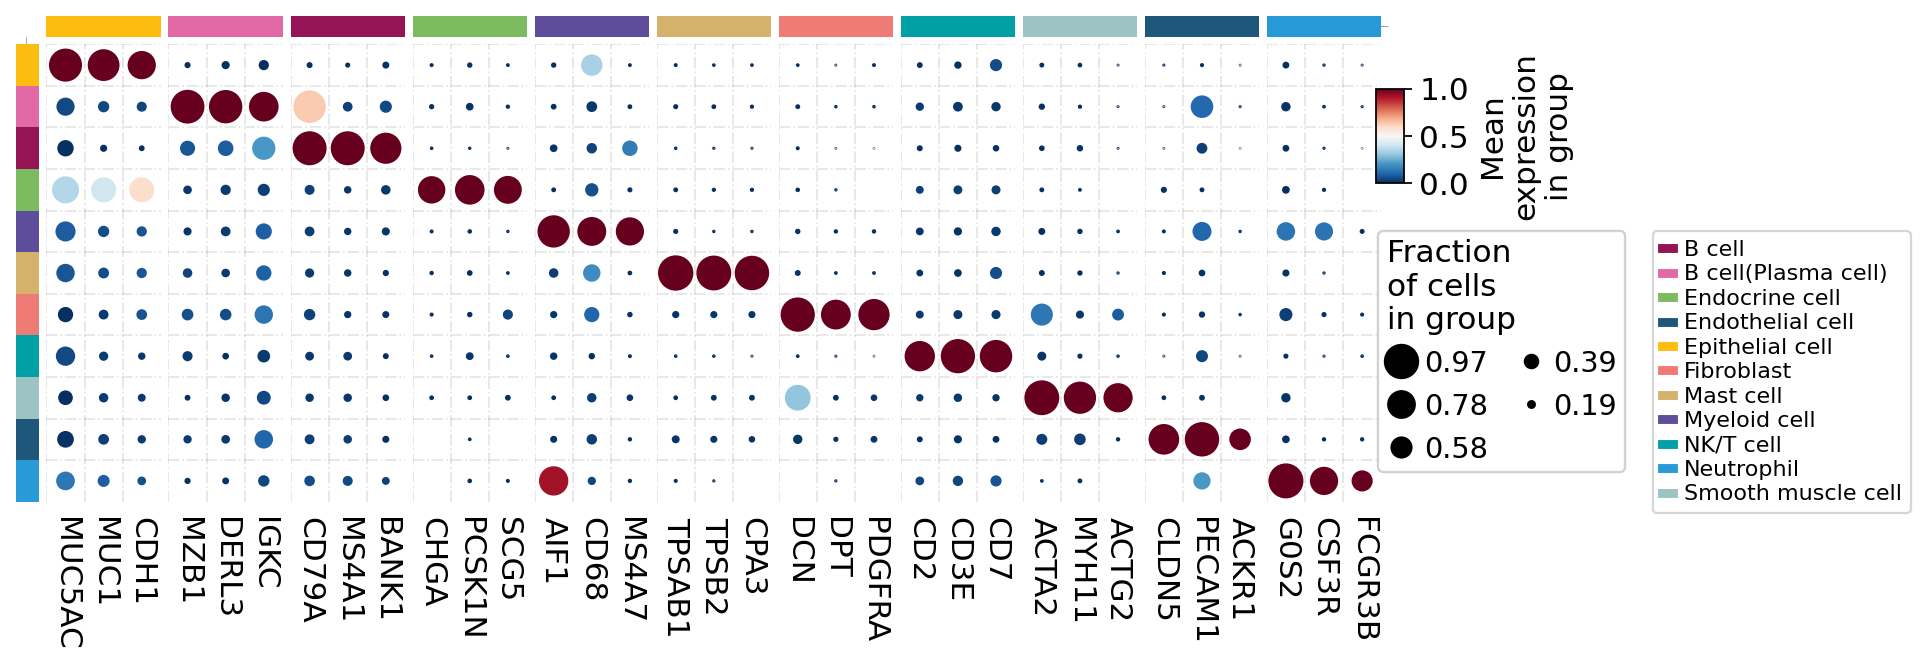

In [12]:
ov.plot_set()

ov.pl.marker_heatmap(
    adata,
    marker_genes_dict,
    groupby='major_celltype',
    color_map="RdBu_r",
    use_raw=True,
    standard_scale="var",
    expression_cutoff=0.0,
    fontsize=12,
    bbox_to_anchor=(9, -2),
    figsize=(9,3.5),
    spines=False,
    show_rownames=False,
    show_colnames=True,
    save_path = "Gastric/Figure/Figure1/Figure1_G.png",
)

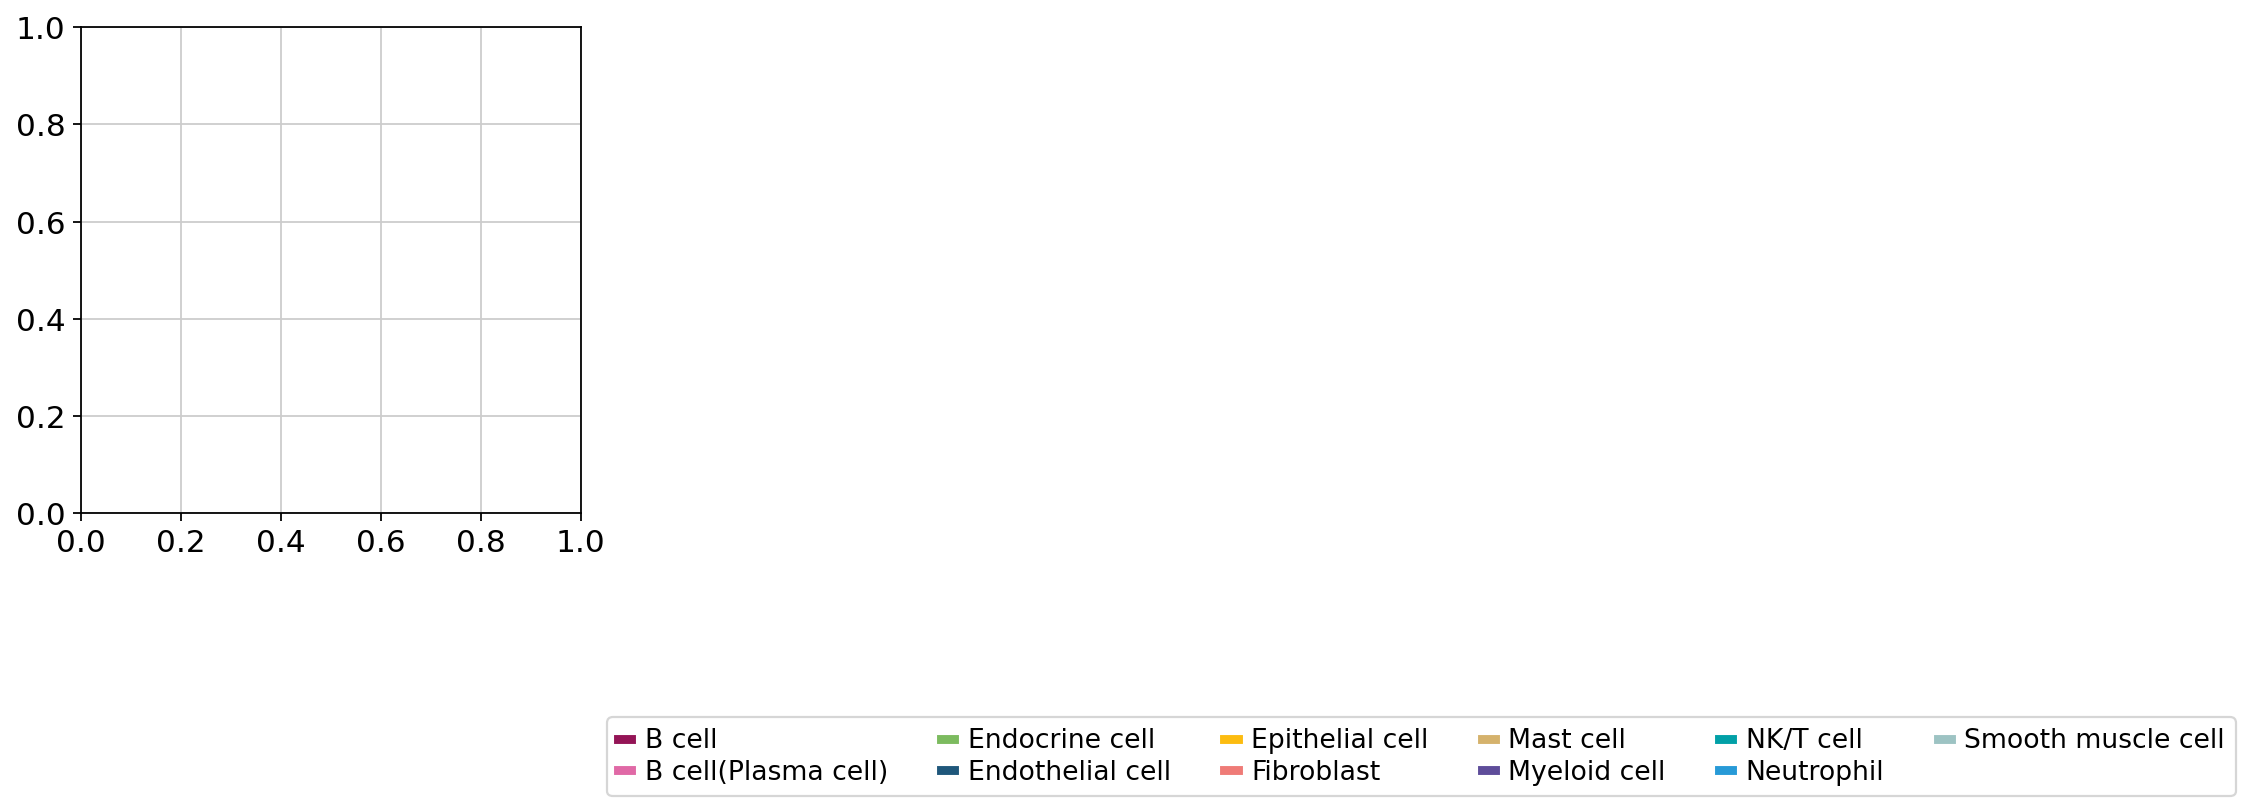

In [15]:
groupby = 'major_celltype'
type_color_all = dict(zip(adata.obs[groupby].cat.categories, adata.uns[f"{groupby}_colors"]))
handles = [plt.Line2D([0], [0], color=type_color_all[cell], lw=4) for cell in type_color_all.keys()]
labels = type_color_all.keys()

# 计算列数，确保至少有1列
ncols = 6

# Add a legend to the right of the existing image
legend_kws = {'fontsize': 12, 'bbox_to_anchor':(1, -0.5),
              'loc': 'center left', 'ncol': ncols}
plt.legend(handles, labels, borderaxespad=1, handletextpad=0.5, labelspacing=0.2, **legend_kws)
plt.savefig('Gastric/Figure/Figure1/Figure1_legend.png', dpi=300, bbox_inches='tight')